In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 6.10 

It says to do this problem before 6.11

In [3]:
def relaxation_method(x0,f,etol):
    """Starting at some initial value x0, 
    apply the relaxation method until convergence (below etol) to the function f. 
    
    """
    x = x0
    steps = 0
    while abs(x - f(x)) > etol:

        x = f(x)
      #  print(x,f(x))

        steps +=1
    return x,steps

a) see code

In [4]:
c = 2
f = lambda x: 1-np.exp(-c*x)
relaxation_method(10,f,1e-6)

(0.79681336309667961, 14)

b) Using the relaxation method, we can calculate the solution for values of c from 0 to 3 (in the function $x = 1 - e^{cx}$,  stepping by 0.01 and plot of x as a function of c. We observe a clear transition from a regime in which x = 0 to a regime of nonzero x. This is another example of a phase transition, and in physics this transition is known as the percolation transition; in epidemiology it is the epidemic threshold.

In [5]:
cs = np.arange(0,3,.01)
xs = []
for c in cs:
    f = lambda x: 1-np.exp(-c*x)
    x = relaxation_method(10,f,1e-6)[0]
    xs.append(x)

Text(0, 0.5, '$x$')

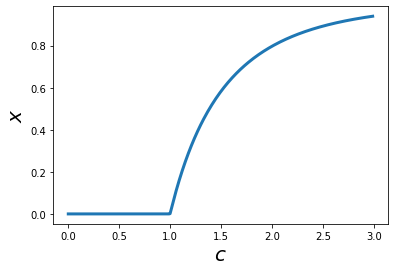

In [11]:
plt.figure(figsize=(6,4))
plt.plot(cs,xs,linewidth = 3)
plt.xlabel('$c$',fontsize = 20)
plt.ylabel('$x$',fontsize = 20)
#plt.yscale('log')
#plt.xscale('log')

We observe this percolation transition at c=1

# 6.11

The ordinary relaxation method involves iterating the equation x′ = f(x), starting from an initial guess, until it converges. As we have seen, this is often a fast and easy way to find solutions to nonlinear equations. However, it is possible in some cases to make the method work even faster using the technique of overrelaxation. Suppose our initial guess at the solution of a particular equation is, say, x = 1, and the final, true solution is x = 5. After the first step of the iterative process, we might then see a value of, say, x = 3. In the overrelaxation method, we observe this value and note that x is increasing, then we deliberately overshoot the calculated value, in the hope that this will get us closer to the final solution—in this case we might pass over x = 3 and go straight to a value of x = 4 perhaps, which is closer to the final solution of x = 5 and hence should get us to that solution quicker. The overrelaxation method provides a formula for performing this kind of overshooting in a controlled fashion and often, though not
always, it does get us to our solution faster. In detail, it works as follows. We can rewrite the equation x′ = f (x) in the form x′ = x + ∆x, where 

∆x = x′ − x = f (x) − x.

The overrelaxation method involves iteration of the modified equation

x′ = x + (1 + ω) ∆x,


(keeping the definition of ∆x the same). If the parameter ω is zero, then this is the same as the ordinary relaxation method, but for ω > 0 the method takes the amount ∆x by which the value of x would have been changed and changes by a little more. Using ∆x = f (x) − x, we can also write x′ as


x′ =x+(1+ω)􏰂f(x)−x􏰃=(1+ω)f(x)−ωx,



Now 6.11, to expedite the rate of convergence of the relaxation method, we can include an additional parameter $\omega$. If $\omega >0$ the relaxation method is now over-relaxed, whereas if $\omega < 0$ the relaxation method is now under-relaxed. In the initial form of the relaxation method we obtained that value for the error on the calclated value is $\epsilon' = \frac{}{}$. By following a similar procedure of Taylor expanding around the true value of the function but applying the new formulation of relaxation (given as $x' = (1+\omega)f(x) - \omega x$, we first ___, then by )___ we find the new value of error in each new step to be ... As we would expect, this value of epsilon is larger than the one previously obtained, assuring that this new formulation should provide a faster rate of converging. 

# a)


Derive an equivalent of Eq. (6.81) for the overrelaxation method and hence show that the error on x′, the equivalent of Eq. (6.83), is given by

# b) 

Consider again the equation x = 1 − exp(−cx) that we solved in Exercise 6.10. Take the program you wrote for part (a) of that exercise, which solved the equation for the case c = 2, and modify it to print out the number of iterations it takes to converge to a solution accurate to 10−6.


We again consider the function $x = 1 - e^{-cx}$, and solve using the relaxation method. As shown by using the function in q1.py, we see that the original relaxation method takes 13 steps to converge below 1e-6. 

In [62]:
def overrelaxation_method(x0,f,w,etol):
    """Starting at some initial value x0, 
    apply the relaxation method until convergence (below etol) to the function f. 
    
    """
    steps = 0
    x = x0
    while abs(x - f(x)) > etol:
      #  delta_x = x - f(x) #this is the current x
      #  x = x + (1 + w)*delta_x
        x = (1+w)*f(x) - w*x
   #     print(x,f(x))
        steps +=1
        if type(x/np.inf) == type(np.nan):
            return x,1000
  #  print("Steps to converge = ", steps)
    return x,steps

In [63]:
c = 2
f = lambda x: 1-np.exp(-c*x)
relaxation_method(1,f,1e-6)

(0.79681336309668871, 13)

In [64]:
c = 2
f = lambda x: 1-np.exp(-c*x)
overrelaxation_method(1,f,.5,1e-6)

(0.79681237298326191, 4)

In [65]:
print("The overrelaxation method takes ", overrelaxation_method(1,f,.5,1e-6)[1], ' steps to converge.')
print("By comparison, the relaxation method took ", relaxation_method(1,f,1e-6)[1], " steps.")

The overrelaxation method takes  4  steps to converge.
By comparison, the relaxation method took  13  steps.


c) Now write a new program (or modify the previous one) to solve the same equation x = 1 − e−cx for c = 2, again to an accuracy of 10−6, but this time using overrelaxation. Have your program print out the answers it finds along with the number of iterations it took to find them. Experiment with different values of ω to see how fast you can get the method to converge. A value of ω = 0.5 is a reasonable starting point. With some trial and error you should be able to get the calculation to converge about twice as fast as the simple relaxation method, i.e., in about half as many iterations.

In [66]:
ws = np.arange(0,1,.1)
convergence_steps = []
for w in ws:
    convergence_steps.append(
    overrelaxation_method(1,f,w,1e-6)[1]
    )

Text(0, 0.5, 'Steps to Converge')

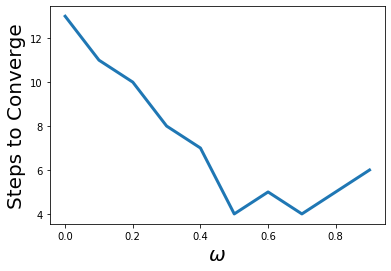

In [67]:
plt.figure(figsize=(6,4))
plt.plot(ws,convergence_steps,linewidth = 3)
#plt.title("Steps to Convergence vs. w")
plt.xlabel('$\omega$',fontsize = 20)
plt.ylabel('Steps to Converge',fontsize=20)

For this particular function and starting point, the optimal value for w is around 0.5, but seems to be somewhere within there and 0.7. 

# d) Are there any circumstances under which using a value ω < 0 would help us find a solution faster than we can with the ordinary relaxation method? (Hint: The answer is yes, but why?)

As stated in the question, yes, there are scenarios where making $\omega < 0$ helps us find a solution than when we use ordinary relaxation. 

In order for a situation like this to arise, we consider the case of when a function would not normally converge. 

Generally speaking, the reason for such a failure is that the value of x at each iterative step never gets closer to it's true value. And in this same circumstance, if we allow the new value $x'$ to be smaller than the relaxation prediction, it will gradually converge when it woudn't. This is the utility of under-relaxation. 

Under relaxation is used to help make functions that normally do converge, but don't under normal conditions of relaxing will go too far. 

In [68]:
c = 2
f = lambda x: 1-np.exp(-c*x)
f = lambda x: 1 - x**3
ws = np.arange(-9,1,.1)
convergence_steps = []
for w in ws:
    convergence_steps.append(
    overrelaxation_method(1,f,w,1e-6)[1]
    )
    
    

/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
/Users/noahkasmanoff/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in double_scalars


KeyboardInterrupt: 

In [40]:
%debug

> <ipython-input-39-aea30111f5a8>(3)<lambda>()
      1 c = 2
      2 f = lambda x: 1-np.exp(-c*x)
----> 3 f = lambda x: 1 - x**3
      4 ws = np.arange(-9,1,.1)
      5 convergence_steps = []

ipdb> x
inf
ipdb> exit


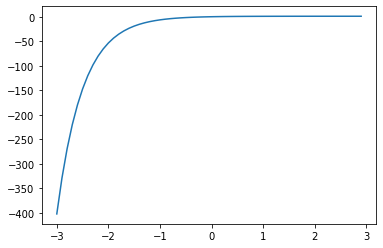

In [38]:
c = 2
f = lambda x: 1-np.exp(-c*x)
xs = np.arange(-3,3,.1)
plt.plot(xs,f(xs))

In [60]:
x

nan

In [61]:
3 / np.inf

0.0